In [167]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import losses
from keras import metrics

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data() 

In [168]:
print("train_data:", train_data.shape)
print("test_data:", test_data.shape)

train_data: (60000, 28, 28)
test_data: (10000, 28, 28)


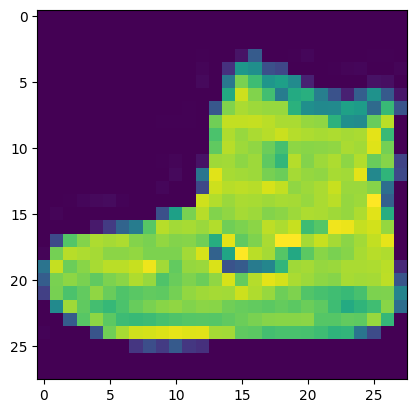

In [169]:
plt.figure()
plt.imshow(train_data[0])

In [170]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [171]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [172]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [173]:
history = model.fit(train_data, train_labels, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5077 - accuracy: 0.8226 - val_loss: 0.4291 - val_accuracy: 0.8512
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3826 - accuracy: 0.8618 - val_loss: 0.3841 - val_accuracy: 0.8643
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3429 - accuracy: 0.8757 - val_loss: 0.3471 - val_accuracy: 0.8768
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3159 - accuracy: 0.8845 - val_loss: 0.3452 - val_accuracy: 0.8769
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2986 - accuracy: 0.8899 - val_loss: 0.3358 - val_accuracy: 0.8792
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2811 - accuracy: 0.8964 - val_loss: 0.3281 - val_accuracy: 0.8842
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2697 - accuracy: 0.9005 - val_loss: 0.3361 - val_accuracy:

In [174]:
test_loss, test_acc = model.evaluate(train_data, train_labels)

1875/1875 [==============================] - 1s 785us/step - loss: 0.1936 - accuracy: 0.9310


In [175]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 863us/step - loss: 0.3582 - accuracy: 0.8838


In [176]:
predictions = model.predict(test_data)

313/313 [==============================] - 0s 719us/step


In [177]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


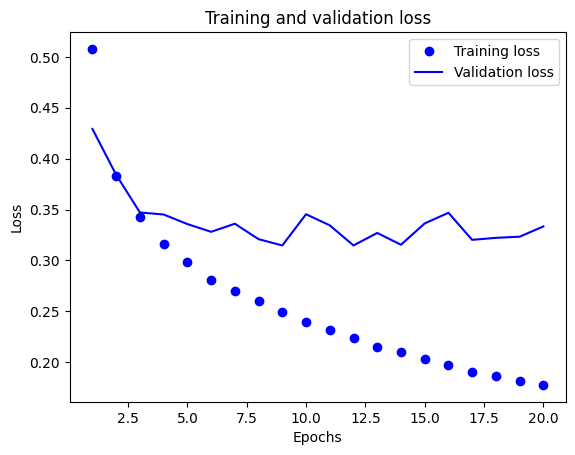

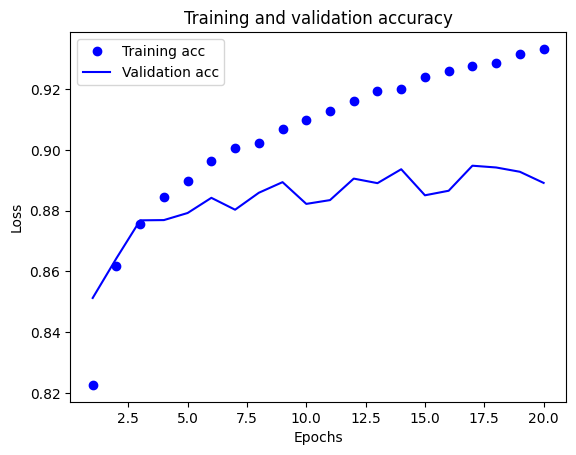

In [178]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

1/1 [==============================] - 0s 42ms/step
Class 0 probability:  0.0000
Class 1 probability:  0.0000
Class 2 probability:  0.0000
Class 3 probability:  0.0000
Class 4 probability:  0.0000
Class 5 probability:  0.0000
Class 6 probability:  0.0000
Class 7 probability:  0.0000
Class 8 probability:  1.0000
Class 9 probability:  0.0000
Фактичний номер класу: 8


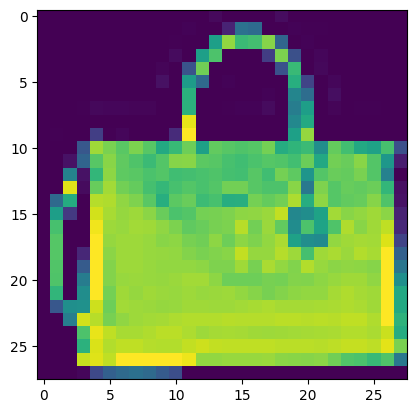

In [179]:
n = 30
predict_data = test_data[n]
predict_labels = test_labels[n]

result = model.predict(predict_data.reshape(1, 784))

for n, r in enumerate(result[0]):
    print(f"Class {n} probability:  %.4f" %r)

plt.figure()
plt.imshow(predict_data)

class_names = ['0 - Футболки', "1 - Шорти", "2 - Светри", "3 - Сукні",
              "4 - Плащі", "5 - Сандалі", "6 - Сорочки", "7 - Кросівки", "8 - Сумки",
              "9 - Черевики"]

print(f'Фактичний номер класу: {predict_labels}')

Отже, побудована модель дає задовільні результати. З графиків видно, що найкраще значення параметру epochs буде дорівнювати 9.